# Bernstein Conference 2023: Additional analyses & plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# figs_path = None
figs_path = './bernstein2023_figs'
if not os.path.exists(figs_path):
    os.makedirs(figs_path)

### Fake adjacency matrix

In [140]:
# Create fake adjacency matrix
np.random.seed(1)
tile_size = 10
p_diag = 0.1
p_off = 0.01
n_tiles = 10
adj_tiles = np.ndarray((n_tiles, n_tiles), dtype=object)
for i in range(n_tiles):
    for j in range(n_tiles):
        if -1 <= i - j <= 1:
            p = [1.0 - p_diag, p_diag]
        else:
            p = [1.0 - p_off, p_off]
        adj_tiles[i, j] = np.random.choice(2, size=(tile_size, tile_size), p=p).astype(float)
adj = np.vstack([np.hstack(_adj) for _adj in adj_tiles])
adj[np.diag_indices(adj.shape[0])] = 0.0
adj[adj == 0.0] = np.nan

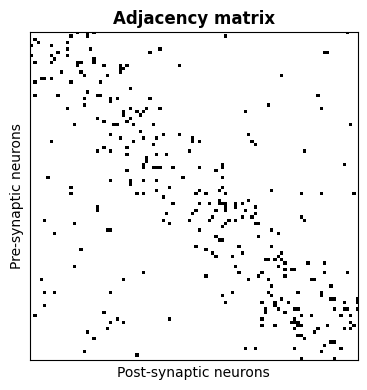

In [141]:
plt.figure(figsize=(6, 4))
plt.imshow(adj, interpolation='nearest', cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.xlabel('Post-synaptic neurons')
plt.ylabel('Pre-synaptic neurons')
plt.title('Adjacency matrix', fontweight='bold')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'adj_matrix_fake.png'), dpi=300)
plt.show()

### Simplified model types

In [144]:
from connectome_manipulator.model_building import model_types

In [142]:
model_files = ['/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb1stOrder-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb2ndOrderComplex-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb3rdOrderComplex-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb4thOrder-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb5thOrder-SSCxO1-Hex0EE.json']


ConnProb1stOrderModel
  p_conn() = 0.010 (constant)


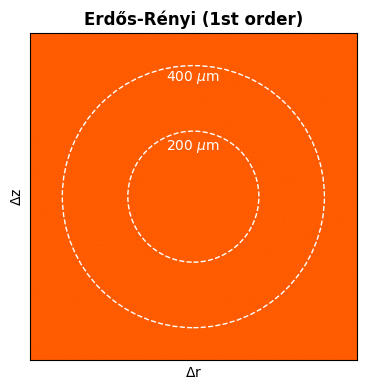

In [175]:
# 1st-order model
model = model_types.AbstractModel.model_from_file(model_files[0])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = np.full_like(vdist, model.get_conn_prob())
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0, vmax=2.0 * model.get_conn_prob())
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p = constant = {model.get_conn_prob():.3f}', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Erdős-Rényi (1st order)', fontweight='bold')
# h_cb = plt.colorbar(label='Conn. prob.', ticks=np.round(model.get_conn_prob() * np.linspace(0, 2, 5), decimals=3))
# h_cb.ax.set_yticklabels(['', '', f'{model.get_conn_prob():.2f}', '', ''])
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_1.png'), dpi=300)
plt.show()


ConnProb2ndOrderComplexExpModel
  p_conn(d) = 0.084 * exp(-0.000186 * d^1.735) + 0.017 * exp(-0.002 * d)
  d...distance


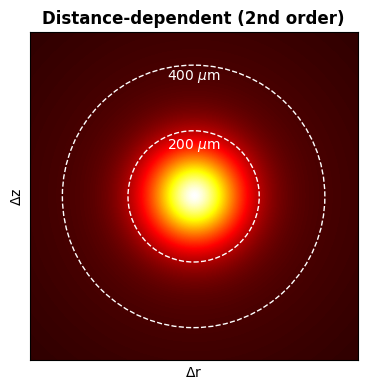

In [176]:
# 2nd-order model
model = model_types.AbstractModel.model_from_file(model_files[1])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = model.get_conn_prob(vdist)
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0)
# plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
# plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p(d) = {model_params["scale"]:.3f} * exp(-{model_params["exponent"]:.3f} * d)', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Distance-dependent (2nd order)', fontweight='bold')
# plt.colorbar(label='Conn. prob.')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_2.png'), dpi=300)
plt.show()


ConnProb3rdOrderComplexExpModel
  p_conn(d, delta) = 0.087 * exp(-0.000042 * d^2.000) + 0.024 * exp(-0.001 * d) if delta < 0
                     0.081 * exp(-0.001004 * d^1.444) + 0.013 * exp(-0.003 * d) if delta > 0
                     AVERAGE OF BOTH MODELS  if delta == 0
  d...distance, delta...difference (tgt minus src) in coordinate 2


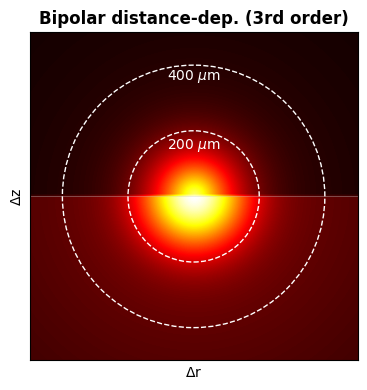

In [177]:
# 3rd-order model
model = model_types.AbstractModel.model_from_file(model_files[2])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = model.get_conn_prob(vdist, np.sign(zv))
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0)
# plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.max(plt.ylim()), f' p(d) = {model_params["scale_P"]:.3f} * exp(-{model_params["exponent_P"]:.3f} * d) if $\\bf\\Delta$z > 0', color='w', ha='center', va='top', fontweight='bold')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p(d) = {model_params["scale_N"]:.3f} * exp(-{model_params["exponent_N"]:.3f} * d) if $\\bf\\Delta$z < 0', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Bipolar distance-dep. (3rd order)', fontweight='bold')
# plt.colorbar(label='Conn. prob.')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_3.png'), dpi=300)
plt.show()


ConnProb4thOrderLinInterpnReducedModel
  p_conn(dr, dz) = LINEAR INTERPOLATION FROM DATA TABLE (396 entries; dr(9): 25.00..425.00, dz(44): -1525.00..625.00)
  dr/dz...radial/axial position offset (tgt minus src), with axial coordinate 2


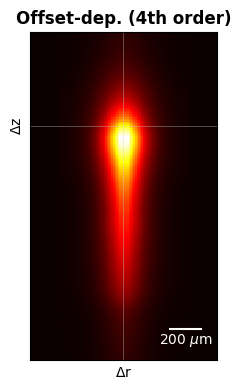

In [178]:
# 4th-order model
model = model_types.AbstractModel.model_from_file(model_files[3])

model_params = model.get_param_dict()
print(model)

dr_bin_size = dz_bin_size = 10
dr_bins = np.arange(0, 601, dr_bin_size)
dz_bins = np.arange(-1500, 601, dz_bin_size)

# Sample positions (at bin centers)
dr_pos = dr_bins[:-1] + 0.5 * dr_bin_size
dz_pos = dz_bins[:-1] + 0.5 * dz_bin_size

# Model probability at sample positions
drv, dzv = np.meshgrid(dr_pos, dz_pos, indexing='ij')
model_pos = np.array([drv.flatten(), dzv.flatten()]).T # Regular grid
model_val = model.get_conn_prob(model_pos[:, 0], model_pos[:, 1])
model_val = model_val.reshape([len(dr_pos), len(dz_pos)])

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plt.imshow(np.hstack([model_val.T[:, ::-1], model_val.T]), interpolation='nearest', extent=(-dr_bins[-1], dr_bins[-1], dz_bins[-1], dz_bins[0]), cmap=plt.cm.hot, vmin=0.0)
plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
bar_x = [300, 500]
bar_y = -1300
plt.plot(bar_x, [bar_y] * 2, 'w-')
plt.text(np.mean(bar_x), bar_y - 20, f'{np.diff(bar_x)[0]} $\\mu$m', color='w', ha='center', va='top')
plt.plot()
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel(' ' * 32 + '$\\Delta$z')
# plt.colorbar(label='Conn. prob.')
plt.title('Offset-dep. (4th order)', fontweight='bold')

plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_4.png'), dpi=300)
plt.show()


ConnProb5thOrderLinInterpnReducedModel
  p_conn(z, dr, dz) = LINEAR INTERPOLATION FROM DATA TABLE (5148 entries; z(13): -2300.00..100.00, dr(9): 25.00..425.00, dz(44): -1525.00..625.00)
  z...axial src position, dr/dz...radial/axial position offset (tgt minus src), with axial coordinate 2


/nvme/pokorny/1724367/ipykernel_289282/4002993660.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


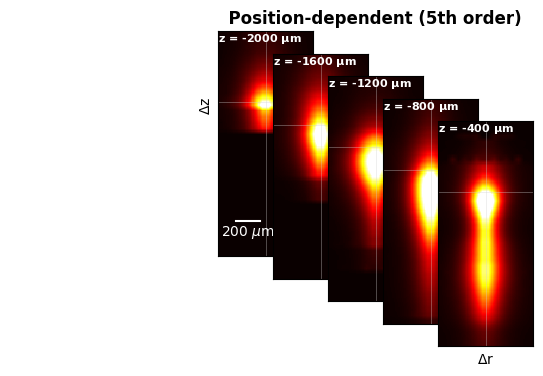

In [179]:
# 5th-order model
model = model_types.AbstractModel.model_from_file(model_files[4])

model_params = model.get_param_dict()
print(model)

z_pos_list = np.arange(-2000, 0, 400)

x_step = 0.11
y_step = 0.05
p_max = np.round(np.max(model.p_conn_table.to_numpy()), decimals=1)
ax_list = []

plt.figure(figsize=(5, 4.5))
# plt.figure(figsize=(6, 4.5))
for zi in range(len(z_pos_list)):
#     ax_list.append(plt.axes([0.1 + (len(z_pos_list) - 1 - zi) * x_step, 0.1 + y_step * zi, 0.5, 0.5]))
    ax_list.append(plt.axes([0.1 + zi * x_step, 0.1 + (len(z_pos_list) - 1 - zi) * y_step, 0.4, 0.5]))
#     plt.subplot(1, len(z_pos_list), zi + 1)
    z_pos = [z_pos_list[zi]]

    dr_bin_size = dz_bin_size = 10
    dr_bins = np.arange(0, 401, dr_bin_size)
    dz_bins = np.arange(-1300, 601, dz_bin_size)

    # Sample positions (at bin centers)
    dr_pos = dr_bins[:-1] + 0.5 * dr_bin_size
    dz_pos = dz_bins[:-1] + 0.5 * dz_bin_size

    # Model probability at sample positions
    zv, drv, dzv = np.meshgrid(z_pos, dr_pos, dz_pos, indexing='ij')
    model_pos = np.array([zv.flatten(), drv.flatten(), dzv.flatten()]).T # Regular grid
    model_val = model.get_conn_prob(model_pos[:, 0], model_pos[:, 1], model_pos[:, 2])
    model_val = model_val.reshape([len(z_pos), len(dr_pos), len(dz_pos)])

    plt.imshow(np.hstack([model_val.T[:, ::-1], model_val.T]), interpolation='nearest', extent=(-dr_bins[-1], dr_bins[-1], dz_bins[-1], dz_bins[0]), cmap=plt.cm.hot, vmin=0.0, vmax=p_max)
    plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
    plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
    if zi == 0:
        plt.title(' ' * 38 + 'Position-dependent (5th order)', fontweight='bold')
        plt.ylabel(' ' * 18 + '$\\Delta$z')
        bar_x = [-250, -50]
        bar_y = -1000
        plt.plot(bar_x, [bar_y] * 2, 'w-')
        plt.text(np.mean(bar_x), bar_y - 20, f'{np.diff(bar_x)[0]} $\\mu$m', color='w', ha='center', va='top')
    plt.gca().invert_yaxis()
    plt.text(np.min(plt.xlim()), np.max(plt.ylim()), f'z = {z_pos_list[zi]} $\\bf\\mu$m', color='w', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    if zi == len(z_pos_list) - 1:
        plt.xlabel('$\\Delta$r')
        
# plt.colorbar(ax=ax_list, label='Conn. prob.', pad=0.02)

plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_5.png'), dpi=300)
plt.show()


### Structural comparison

In [3]:
struct_files = ['/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Orig_ConnPerLayer_Hex0EE.pickle',
                '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-1_ConnPerLayer_Hex0EE.pickle',
                '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-2_ConnPerLayer_Hex0EE.pickle',
                '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-3_ConnPerLayer_Hex0EE.pickle',
                '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-4_ConnPerLayer_Hex0EE.pickle',
                '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-5_ConnPerLayer_Hex0EE.pickle']
plot_names = ['Original',
              '1st order',
              '2nd order',
              '3rd order',
              '4th order',
              '5th order']

In [4]:
import pickle
from connectome_manipulator.connectome_comparison.structural_comparator import results_diff
res_dicts = []
for fn in struct_files:
    with open(fn, 'rb') as f:
        res_dict = pickle.load(f)
    res_dicts.append(res_dict)

In [14]:
def get_flattened_data(d):
    """ Returns raw (flattened) data from sparse matrix or numpy array """
    if hasattr(d, 'flatten'): # Numpy arrays
        return d.flatten()
    else:
        if hasattr(d, 'data') and hasattr(d.data, 'flatten'): # Sparse matrix
            return d.data.flatten()
        else:
            assert False, 'ERROR: Flattened data extraction error!'

def lower_first(txt):
    return txt[0].lower() + txt[1:]

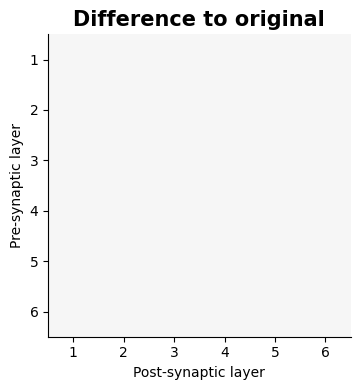

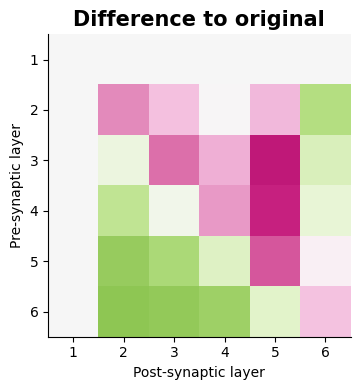

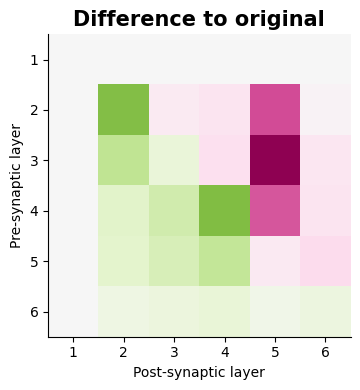

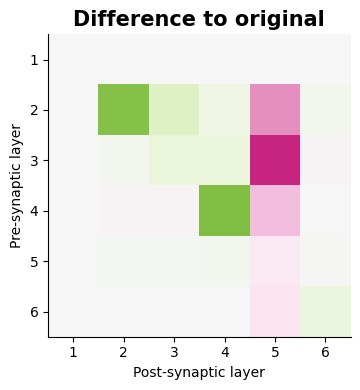

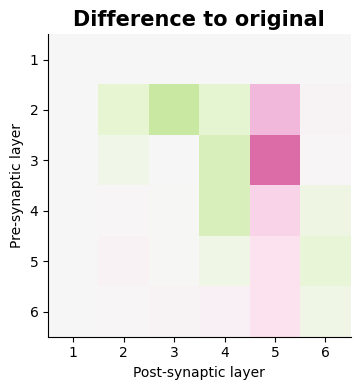

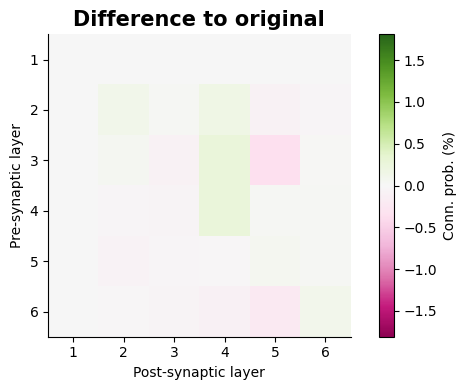

In [21]:
res_sel = 'conn_prob' # 'conn_prob' # 'nsyn_conn'
diff_base_idx = 0
plot_diff = True
for i in range(len(res_dicts)):
    if plot_diff:
        res_dict = results_diff(res_dicts[diff_base_idx], res_dicts[i])[res_sel]
    else:
        res_dict = res_dicts[i][res_sel]
    common_dict = res_dicts[i]['common']

    range_prctile = 100
    if plot_diff:
        all_data = np.concatenate([get_flattened_data(res[res_sel]['data']) for res in [results_diff(res_dicts[diff_base_idx], r) for r in res_dicts]])
    else:
        all_data = np.concatenate([get_flattened_data(res[res_sel]['data']) for res in res_dicts])
#     all_data = get_flattened_data(res_dict['data'])
    all_data = all_data[np.isfinite(all_data)]
    plot_range = [-np.percentile(-all_data[all_data < 0], range_prctile) if np.any(all_data < 0) else 0.0,
                  np.percentile(all_data[all_data > 0], range_prctile) if np.any(all_data > 0) else 0.0] # Common plot range

    fig_title = plot_names[i]
    if plot_diff:
        plot_range = [-np.max(np.abs(plot_range)), np.max(np.abs(plot_range))] # Symmetric plot range
        # fig_title = f'{fig_title} difference to {lower_first(plot_names[diff_base_idx])}'
        fig_title = f'Difference to {lower_first(plot_names[diff_base_idx])}'

    plt.figure(figsize=(6, 4))
    cmap = 'PiYG' if plot_diff else 'hot_r'
    group_by = 'layer'
    plt.imshow(res_dict['data'], interpolation='nearest', cmap=cmap, vmin=plot_range[0], vmax=plot_range[-1])
    plt.title(fig_title, fontweight='bold', fontsize=15 if plot_diff else 20)
    plt.xlabel(f'Post-synaptic {group_by}')
    plt.ylabel(f'Pre-synaptic {group_by}')
    plt.yticks(range(len(common_dict['src_group_values'])), common_dict['src_group_values'])
    plt.xticks(range(len(common_dict['tgt_group_values'])), common_dict['tgt_group_values'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i == len(res_dicts) - 1:
        plt.colorbar(label=res_dict['unit'])

    plt.tight_layout()
    if figs_path is not None:
        plt.savefig(os.path.join(figs_path, f'struct_comp_{i}__{fig_title.replace(" ", "_").replace("(", "").replace(")", "")}__{res_dict["unit"].split(" (")[0].replace(" ", "_").replace(".", "").replace("#", "").replace("/", "")}.png'), dpi=300)
    plt.show()


### In/out-degrees

In [4]:
adj_files = ['/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Orig_Adjacency_Hex0EE.pickle',
             '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-1_Adjacency_Hex0EE.pickle',
             '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-2_Adjacency_Hex0EE.pickle',
             '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-3_Adjacency_Hex0EE.pickle',
             '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-4_Adjacency_Hex0EE.pickle',
             '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/structural_comparator_v2/SSCx-HexO1-Release/data/Order-5_Adjacency_Hex0EE.pickle']


In [5]:
# Check adjacency/count matrices
import pickle

for ci, cn in enumerate(plot_names):
    adj_fn = adj_files[ci]
    with open(adj_fn, 'rb') as f:
        adj_dict = pickle.load(f)
    adj_mat = adj_dict['adj']['data']
    cnt_mat = adj_dict['adj_cnt']['data']
    print(f'{cn}: {adj_mat.shape[0]}x{adj_mat.shape[1]} neurons, {cnt_mat.sum()} synapses, {adj_mat.count_nonzero()} connections, p_conn = {adj_mat.count_nonzero() / np.prod(adj_mat.shape):.6f}')

Original: 26787x26787 neurons, 31212240 synapses, 7203362 connections, p_conn = 0.010039
1st order: 26787x26787 neurons, 26603307 synapses, 7205703 connections, p_conn = 0.010042
2nd order: 26787x26787 neurons, 29272858 synapses, 7203361 connections, p_conn = 0.010039
3rd order: 26787x26787 neurons, 30173482 synapses, 7203364 connections, p_conn = 0.010039
4th order: 26787x26787 neurons, 30332403 synapses, 7203362 connections, p_conn = 0.010039
5th order: 26787x26787 neurons, 31153461 synapses, 7203362 connections, p_conn = 0.010039


In [6]:
adj_mats = []
for fn in adj_files:
    with open(fn, 'rb') as f:
        adj_dict = pickle.load(f)
    adj_mats.append(adj_dict['adj']['data'])


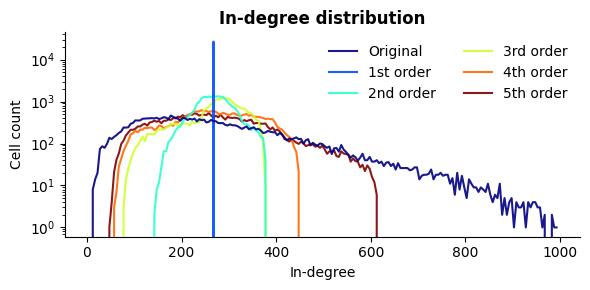

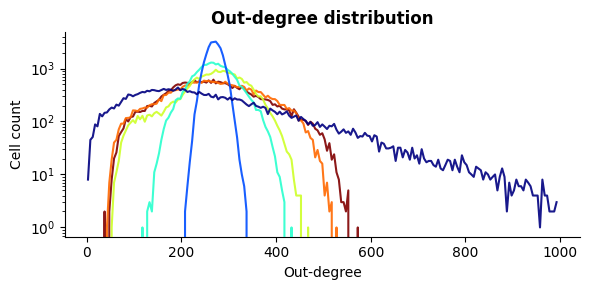

In [266]:
bin_size = 5
bins = np.arange(0, 1000, bin_size)
circ_colors = plt.cm.jet(np.linspace(0, 1, len(plot_names)))

plt.figure(figsize=(6, 3))
for ci, cn in enumerate(plot_names):
    in_deg = np.array(np.sum(adj_mats[ci], 0)).flatten()
    counts, _ = np.histogram(in_deg, bins=bins, density=False)
    plt.plot(bins[:-1] + 0.5 * bin_size, counts, '-', label=cn, color=circ_colors[ci, :], alpha=0.9, zorder=len(plot_names) - ci)
plt.yscale('log')
plt.xlabel('In-degree')
plt.ylabel('Cell count')
plt.title('In-degree distribution', fontweight='bold')
plt.legend(ncols=2, frameon=False)
# plt.yticks([])
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'struct_comp__in_degree.png'), dpi=300)
plt.show()

plt.figure(figsize=(6, 3))
for ci, cn in enumerate(plot_names):
    out_deg = np.array(np.sum(adj_mats[ci], 1)).flatten()
    counts, _ = np.histogram(out_deg, bins=bins, density=False)
    plt.plot(bins[:-1] + 0.5 * bin_size, counts, '-', label=cn, color=circ_colors[ci, :], alpha=0.9, zorder=len(plot_names) - ci)
plt.yscale('log')
plt.xlabel('Out-degree')
plt.ylabel('Cell count')
plt.title('Out-degree distribution', fontweight='bold')
# plt.legend()
# plt.yticks([])
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'struct_comp__out_degree.png'), dpi=1200)
plt.show()

### Triad counts

Pre-computed in `bernstein2023_triads.ipynb`, using sub-sampled adjacency matrices (same trends as in full matrices!)

In [27]:
circ_names = ['Original', '1st order', '2nd order', '3rd order', '4th order', '5th order']
sub_fraction = 0.1

In [36]:
# Load pre-computed triad counts
triad_counts = []
for _cn in circ_names:
    _fn = f'triad_counts__sub{sub_fraction}__{_cn}.txt'
    _cnt = np.loadtxt(os.path.join(figs_path, _fn), dtype=int)
    triad_counts.append(_cnt)

/nvme/pokorny/1741984/ipykernel_166287/2214417000.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot((_cnt / np.sum(_cnt) - triad_counts[norm_idx] / np.sum(triad_counts[norm_idx])) / (_cnt / np.sum(_cnt) + triad_counts[norm_idx] / np.sum(triad_counts[norm_idx])), color=circ_colors[_idx, :], label=_cn)


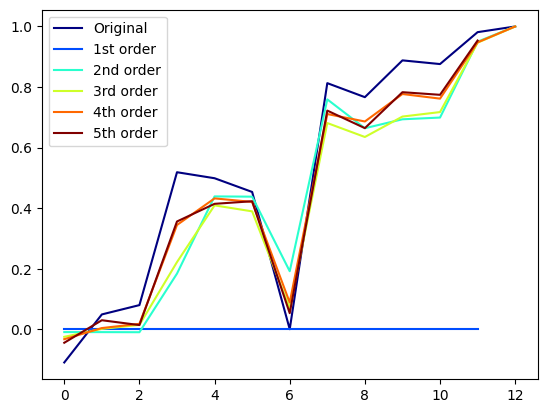

In [51]:
# Plot normalized triad counts
norm_idx = 1  # Normalized by ER (1st order)
circ_colors = plt.cm.jet(np.linspace(0, 1, len(circ_names)))
plt.figure()
for _idx, (_cn, _cnt) in enumerate(zip(circ_names, triad_counts)):
    # plt.plot(_cnt, color=circ_colors[_idx, :], label=_cn)
    # plt.plot(_cnt / np.sum(_cnt), color=circ_colors[_idx, :], label=_cn)
    # plt.plot((_cnt - triad_counts[norm_idx]) / (_cnt + triad_counts[norm_idx]), color=circ_colors[_idx, :], label=_cn)
    plt.plot((_cnt / np.sum(_cnt) - triad_counts[norm_idx] / np.sum(triad_counts[norm_idx])) / (_cnt / np.sum(_cnt) + triad_counts[norm_idx] / np.sum(triad_counts[norm_idx])), color=circ_colors[_idx, :], label=_cn)
plt.legend()
plt.show()

### Spike trains

In [119]:
sim_name = 'Reliab'
seeds = [582801, 993793, 133952]

res_names = [str(_seed) for _seed in seeds]
plot_names = [f'seed={_res}' for _res in res_names]
sim_configs = {_res: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__{sim_name}/seed={_seed}/simulation_config.json' for _res, _seed in zip(res_names, seeds)}

In [188]:
from utils import extract_spikes, plot_spikes_per_layer
node_set = 'hex0'
load_if_existing = True

spikes_dict = extract_spikes(res_names, sim_configs, node_set=node_set, save_path=figs_path, save_name='spikes', load_if_existing=load_if_existing)


INFO: Spike data loaded from "./bernstein2023_figs/spikes_hex0.npz"


In [231]:
from bluepysnap import Simulation
import json
import pandas as pd
import pickle

def pat_to_idx(pat):
    idx = np.array([ord(_p) for _p in pat]) # Convert pattern strings 'A', 'B', ...
    idx = idx - ord('A')                    # to indices 0, 1, ...
    return idx

spike_files = []
t_stim = None
stim_train = None
vpm_patterns = {}
vpm_data = None
for _res in res_names:
    sim = Simulation(sim_configs[_res])

    # Pyramid base stimulus
    sim_dir = os.path.split(sim.config['output']['output_dir'])[0]
    spike_file = os.path.join(sim_dir, sim.config['inputs']['Stimulus_spikeReplayVPM']['spike_file'])
    cmpgn_dir = os.path.split(sim_dir)[0]
    wkflw_cfg_file = os.path.join(cmpgn_dir, 'config.json')
    with open(wkflw_cfg_file, 'r') as f:
        wkflw_cfg = json.load(f)
    stim_stream_fn = f"stimulus_stream__start{wkflw_cfg['attrs']['stim_start']}__end{wkflw_cfg['attrs']['stim_end'] + 1}__rate{wkflw_cfg['attrs']['stim_rate']:.0f}__seed{wkflw_cfg['attrs']['stim_seed']}.txt"
    stim_stream_df = pd.read_csv(os.path.join(cmpgn_dir, 'input_spikes', stim_stream_fn), sep=' ', header=None, names=['Time', 'Pattern'])
    t_stim_tmp = stim_stream_df['Time'].to_numpy()
    stim_train_tmp = pat_to_idx(stim_stream_df['Pattern'])  # Convert pattern strings 'A', 'B', ... to indices 0, 1, ...

    # VPM fibers
    assert wkflw_cfg['attrs']['supersample'], "ERROR: Supersampling expected!"
    vpm_fib_fn = 'VPM__Mosaic__supersample.txt'
    vpm_tmp = np.loadtxt(os.path.join(cmpgn_dir, 'projections', vpm_fib_fn))
    if vpm_data is None:
        vpm_data = vpm_tmp
        vpm_nids, vpm_pos = vpm_data[:, 0].astype(int), vpm_data[:, 1:]
        vpm_df = pd.DataFrame(vpm_pos, index=vpm_nids, columns=["x", "y"])
        vpm_df.index.name = 'nid'
    else:
        np.testing.assert_array_equal(vpm_data, vpm_tmp)
    vpm_pat_fn = f"VPM__Mosaic__supersample__nc{wkflw_cfg['attrs']['n_clusters']}__pct{wkflw_cfg['attrs']['vpm_pct']}__seed{wkflw_cfg['attrs']['stim_seed']}__pattern_nids.pkl"
    with open(os.path.join(cmpgn_dir, 'input_spikes', vpm_pat_fn), 'rb') as f:
        vpm_dict = pickle.load(f)
    for _k, _v in vpm_dict.items():
        if _k in vpm_patterns:
            np.testing.assert_array_equal(vpm_patterns[_k], vpm_dict[_k])
        else:
            vpm_patterns[_k] = vpm_dict[_k]

    spike_files.append(spike_file)
    if t_stim is None:
        t_stim = t_stim_tmp
    else:
        np.testing.assert_array_equal(t_stim, t_stim_tmp)
    if stim_train is None:
        stim_train = stim_train_tmp
    else:
        np.testing.assert_array_equal(stim_train, stim_train_tmp)
print(f'STIM TIMES: {t_stim} ms')
print(f'STIM TRAIN: {stim_train}')
print(f'VPM FIBERS: {vpm_df.shape[0]}')
print(f'VPM PATTERNS:', end=' ')
for _k, _v in vpm_patterns.items():
    print(f'{_k} ({len(_v)} fibers)', end=' ')

STIM TIMES: [ 2000  2500  3000  3500  4000  4500  5000  5500  6000  6500  7000  7500
  8000  8500  9000  9500 10000 10500 11000 11500 12000 12500 13000 13500
 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500
 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500
 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500
 32000 32500 33000 33500] ms
STIM TRAIN: [4 5 1 6 7 4 1 2 6 3 1 7 0 7 1 4 2 0 5 5 6 2 2 1 4 4 3 3 7 0 6 0 1 7 0 5 2
 3 6 1 6 3 2 3 1 7 2 5 5 4 6 3 3 0 2 0 5 0 4 7 4 7 6 5]
VPM FIBERS: 5388
VPM PATTERNS: A (230 fibers) B (230 fibers) C (230 fibers) D (230 fibers) E (230 fibers) F (230 fibers) G (230 fibers) H (230 fibers) 

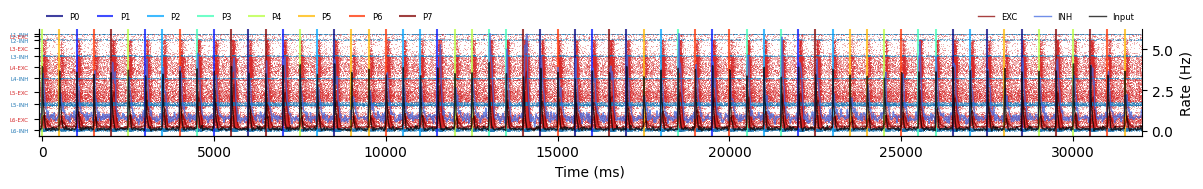

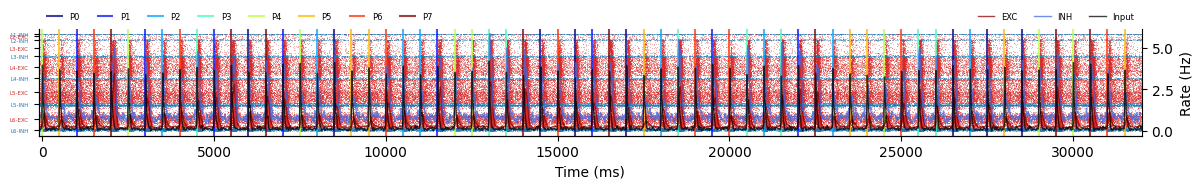

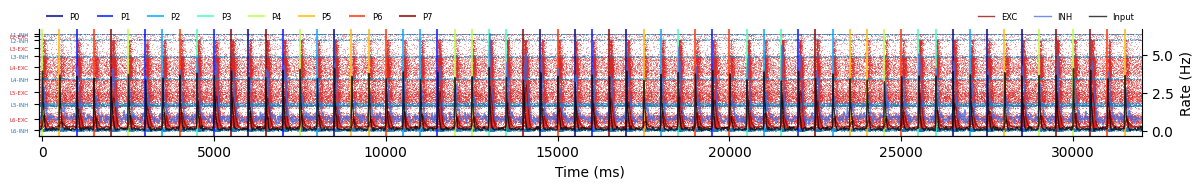

In [192]:
# Plot spike trains of all stimuli
t_start = -100  # Rel. to t_zero (ms)
# t_end = 9900  # Rel. to t_zero (ms)
t_end = 32000  # Rel. to t_zero (ms)
t_zero = 2000  # Zero-offset (ms)

sep = ' '
psth_dict={'EXC': spikes_dict['spk_exc'], 'INH': spikes_dict['spk_inh'], 'Input': [pd.read_csv(_file, sep=sep) for _file in spike_files]}
plot_spikes_per_layer(plot_names, spikes_dict['spk_exc_per_layer'], spikes_dict['spk_inh_per_layer'], t_start, t_end, t_zero, t_stim=t_stim, stim_train=stim_train, figsize=(12, 2), save_path=figs_path, psth_dict=psth_dict, dpi=600, no_title=True)

### Patterns

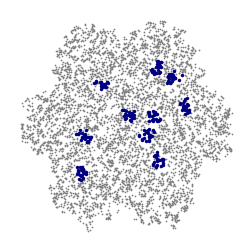

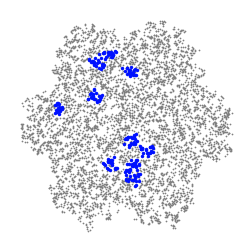

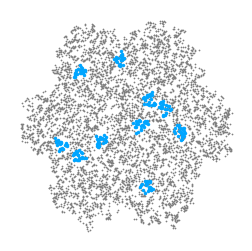

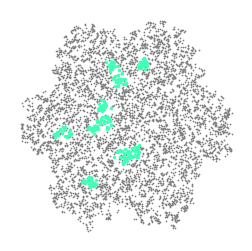

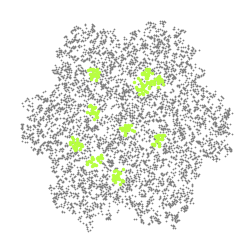

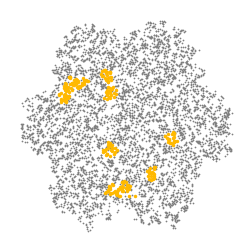

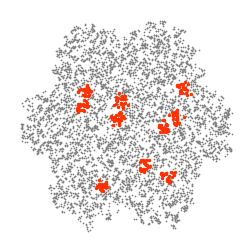

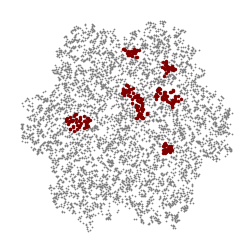

In [257]:
num_patterns = len(vpm_patterns)
pat_colors = plt.cm.jet(np.linspace(0, 1, num_patterns))

for _p, _nids in vpm_patterns.items():
    _idx = pat_to_idx(_p)[0]
    plt.figure(figsize=(3, 3))
    plt.plot(vpm_df['x'], vpm_df['y'], '.', color='grey', markersize=2.5, markeredgecolor='none')
    plt.plot(vpm_df.loc[_nids]['x'], vpm_df.loc[_nids]['y'], '.', color=pat_colors[_idx, :], markersize=5, markeredgecolor='none')
    plt.axis('off')
    plt.savefig(os.path.join(figs_path, f'pattern_{_idx}.png'), dpi=1200)
plt.show()

### Spontaneous firing rates (10s)

In [32]:
ORDINAL_DICT = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}

In [79]:
# Simulation paths
sim_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2'
sim_seed = 628462

order = [1, 2, 3, 4, 5]
circuit_names = ['SSCx-HexO1-Release-TC'] + [f'SSCx-HexO1-Release-TC__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
plot_names = ['Original'] + [f'{ORDINAL_DICT[_ord]} order' for _ord in order]
sim_names_spont = ['SSCx-HexO1-Release-TC__Spont'] + [f'SSCx-HexO1-Release-TC__Spont__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
sim_configs_spont = {_c: os.path.join(sim_path, _sim, f'seed={sim_seed}', 'simulation_config.json') for _c, _sim in zip(circuit_names, sim_names_spont)}  # SONATA simulation config

print('Spont sims:')
for _sim, _cfg in sim_configs_spont.items():
    assert os.path.exists(_cfg)
    print(f'  {_sim}')

Spont sims:
  SSCx-HexO1-Release-TC
  SSCx-HexO1-Release-TC__ConnRewireOrder1Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder2Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder3Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder4Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder5Hex0EE


In [83]:
# Extract (or load) single-cell firing rates
from utils import extract_single_cell_rates, plot_cell_rate_histograms

t_start = 2000 # (ms)
t_end = 12000 # (ms)
node_set = 'hex0'
load_if_existing = True

cell_rates_dict = extract_single_cell_rates(circuit_names, sim_configs_spont, node_set=node_set, t_start=t_start, t_end=t_end, save_path=figs_path, save_name='cell_rates_spont', load_if_existing=load_if_existing)


INFO: Cell rate data loaded from "./bernstein2023_figs/cell_rates_spont_hex0.npz"


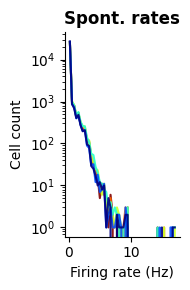

In [86]:
# Plot single-cell rate histograms
plot_cell_rate_histograms(cell_rates_dict['spk_rates'], plot_names, sim_type='Spont.', figsize=(2, 3), bins=50, show_legend=False, save_path=figs_path, dpi=1200)

### Stimulus-evoked firing rates & PSTHs (reliability campaigns: 32s, 8 x 8 patterns)

In [87]:
# Simulation paths
sim_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2'
sim_seed = 582801

order = [1, 2, 3, 4, 5]
circuit_names = ['SSCx-HexO1-Release-TC'] + [f'SSCx-HexO1-Release-TC__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
plot_names = ['Original'] + [f'{ORDINAL_DICT[_ord]} order' for _ord in order]
sim_names_reliab = ['SSCx-HexO1-Release-TC__Reliab'] + [f'SSCx-HexO1-Release-TC__Reliab__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
sim_configs_reliab = {_c: os.path.join(sim_path, _sim, f'seed={sim_seed}', 'simulation_config.json') for _c, _sim in zip(circuit_names, sim_names_reliab)}  # SONATA simulation config

print('Reliab sims:')
for _sim, _cfg in sim_configs_reliab.items():
    assert os.path.exists(_cfg)
    print(f'  {_sim}')

Reliab sims:
  SSCx-HexO1-Release-TC
  SSCx-HexO1-Release-TC__ConnRewireOrder1Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder2Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder3Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder4Hex0EE
  SSCx-HexO1-Release-TC__ConnRewireOrder5Hex0EE


In [88]:
# Extract (or load) single-cell firing rates
from utils import extract_single_cell_rates, extract_spikes, plot_cell_rate_histograms

t_start = 2000 # (ms)
t_end = 34000 # (ms)
node_set = 'hex0'
load_if_existing = True

cell_rates_dict = extract_single_cell_rates(circuit_names, sim_configs_reliab, node_set=node_set, t_start=t_start, t_end=t_end, save_path=figs_path, save_name='cell_rates_reliab', load_if_existing=load_if_existing)
spikes_dict = extract_spikes(circuit_names, sim_configs_reliab, node_set=node_set, save_path=figs_path, save_name='spikes_reliab', load_if_existing=load_if_existing)


INFO: Cell rate data loaded from "./bernstein2023_figs/cell_rates_reliab_hex0.npz"
INFO: Spike data loaded from "./bernstein2023_figs/spikes_reliab_hex0.npz"


In [89]:
from bluepysnap import Simulation
import json
import pandas as pd
import pickle

def pat_to_idx(pat):
    idx = np.array([ord(_p) for _p in pat]) # Convert pattern strings 'A', 'B', ...
    idx = idx - ord('A')                    # to indices 0, 1, ...
    return idx

spike_files = []
t_stim = None
stim_train = None
for _cn in circuit_names:
    sim = Simulation(sim_configs_reliab[_cn])

    # Pyramid base stimulus
    sim_dir = os.path.split(sim.config['output']['output_dir'])[0]
    spike_file = os.path.join(sim_dir, sim.config['inputs']['Stimulus_spikeReplayVPM']['spike_file'])
    cmpgn_dir = os.path.split(sim_dir)[0]
    wkflw_cfg_file = os.path.join(cmpgn_dir, 'config.json')
    with open(wkflw_cfg_file, 'r') as f:
        wkflw_cfg = json.load(f)
    stim_stream_fn = f"stimulus_stream__start{wkflw_cfg['attrs']['stim_start']}__end{wkflw_cfg['attrs']['stim_end'] + 1}__rate{wkflw_cfg['attrs']['stim_rate']:.0f}__seed{wkflw_cfg['attrs']['stim_seed']}.txt"
    stim_stream_df = pd.read_csv(os.path.join(cmpgn_dir, 'input_spikes', stim_stream_fn), sep=' ', header=None, names=['Time', 'Pattern'])
    t_stim_tmp = stim_stream_df['Time'].to_numpy()
    stim_train_tmp = pat_to_idx(stim_stream_df['Pattern'])  # Convert pattern strings 'A', 'B', ... to indices 0, 1, ...

    spike_files.append(spike_file)
    if t_stim is None:
        t_stim = t_stim_tmp
    else:
        np.testing.assert_array_equal(t_stim, t_stim_tmp)
    if stim_train is None:
        stim_train = stim_train_tmp
    else:
        np.testing.assert_array_equal(stim_train, stim_train_tmp)
print(f'STIM TIMES: {t_stim} ms')
print(f'STIM TRAIN: {stim_train}')

STIM TIMES: [ 2000  2500  3000  3500  4000  4500  5000  5500  6000  6500  7000  7500
  8000  8500  9000  9500 10000 10500 11000 11500 12000 12500 13000 13500
 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500
 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500
 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500
 32000 32500 33000 33500] ms
STIM TRAIN: [4 5 1 6 7 4 1 2 6 3 1 7 0 7 1 4 2 0 5 5 6 2 2 1 4 4 3 3 7 0 6 0 1 7 0 5 2
 3 6 1 6 3 2 3 1 7 2 5 5 4 6 3 3 0 2 0 5 0 4 7 4 7 6 5]


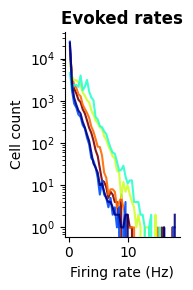

In [90]:
# Plot single-cell rate histograms
plot_cell_rate_histograms(cell_rates_dict['spk_rates'], plot_names, sim_type='Evoked', figsize=(2, 3), bins=50, show_legend=False, save_path=figs_path, dpi=1200)

In [93]:
# Compute & plot PSTHs
from utils import extract_psths, extract_overall_psths, plot_psths

t_psth = [0, 500]
bin_size = 2  # (ms)
psths_exc, psths_inh, psth_bins = extract_psths(spikes_dict['spk_exc'], spikes_dict['spk_inh'], t_stim, t_psth, bin_size)

spikes_dict['spk_all'] = [pd.concat([spikes_dict['spk_exc'][_idx], spikes_dict['spk_inh'][_idx]]).sort_index() for _idx in range(len(circuit_names))]
psths_all, _ = extract_overall_psths(spikes_dict['spk_all'], t_stim, t_psth, bin_size)


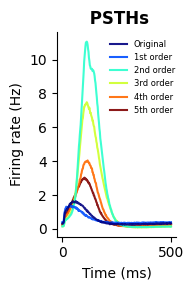

In [102]:
plot_psths(psths_all, psth_bins, plot_names, '', figsize=(2, 3), save_path=figs_path, lgd_props={'loc': 'upper right', 'fontsize': 6, 'bbox_to_anchor': [1.05, 1.0], 'frameon': False})

### Reliability

- Original: 10/10 sims
- 1st order: 9/10 sims + 1 launched
- 2nd order: 10/10 sims
- 3rd order: 9/10 sims + 1 launched
- 4th order: 10/10 sims
- 5th order: 10/10 sims

Pre-computed in `bernstein2023_reliability.ipynb`

In [106]:
import pickle
circ_names = ['Original', '2nd order', '4th order', '5th order']
# circ_names = ['Original', '2nd order', '4th order']

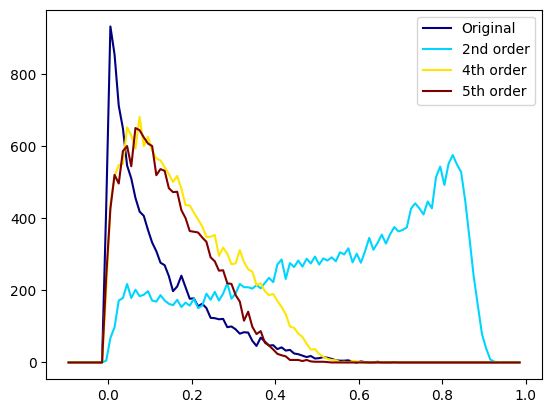

In [107]:
bin_size = 0.01
reliab_bins = np.arange(-0.1, 1.0, bin_size)
bin_centers = reliab_bins[:-1] + 0.5 * bin_size

circ_colors = plt.cm.jet(np.linspace(0, 1, len(circ_names)))

plt.figure()
for _idx, _cn in enumerate(circ_names):
    _fn = f'reliability_rates_centeredTrue__{_cn}.pkl'
#     _fn = f'reliability_rates_centeredFalse__{_cn}.pkl'
#     _fn = f'reliability_rates_sigma100_centeredTrue__{_cn}.pkl'
#     _fn = f'reliability_rates_sigma100_centeredFalse__{_cn}.pkl'
    with open(os.path.join(figs_path, _fn), 'rb') as f:
        rr_dict = pickle.load(f)
        reliab = rr_dict['reliab']
        rates =  rr_dict['rates']
    hist, _ = np.histogram(reliab, bins=reliab_bins)
    plt.plot(bin_centers, hist, color=circ_colors[_idx, :], label=_cn)
    # plt.plot(reliab, rates, '.', alpha=0.25, ms=3, markeredgecolor='none', color=circ_colors[_idx, :], label=_cn)
# plt.ylim([0, 10])
plt.legend()
plt.show()

In [ ]:
# Trim PNGs
# mogrify -trim *.png